# Final Capstone
### Application of Clustering and Classification models to Data Management Tool 
 
### Exploratory Data Analysis

<b>Shafiq Jadallah    
Thinkful Data Science   
Dec, 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
#Import the dataset

audit_df=pd.read_csv('/Users/sjadallah/Dropbox/Thinkful_data/Unsupervised Learning/baler_pack_20191025.1545.csv')

audit_df.head().T
np.round(audit_df, decimals=3)

/Users/sjadallah/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,14,19,20,21,31,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,device_id,material_type,package_id,net_weight,unit,package_date,create_date,employee_code,img_url,...,DeviceCode,material_type.1,MaterialDescription_FromOriginal,MaterialClass_FromOriginal,package_date.1,package_id.1,audit_status.1,DeviceTypeFromSchema,DeviceCodeFromSchema,reject_reason
0,01a0ce14-1dd6-4d29-ae77-3d5edae5dbc9,fa4b355b-a235-477b-91e9-fdcc9c607d69,A,0,0.0,lb,2015-11-10 05:34:42,2015-11-10 05:46:17,001,NaN,...,NaN,A,NaN,NaN,2015-11-10 05:34:42,0,A,Baler,NaN,NaN
1,02383a7b-940c-48de-81c6-a272ef963ba7,fa4b355b-a235-477b-91e9-fdcc9c607d69,A,0,0.0,lb,2015-11-10 05:34:42,2015-11-10 05:46:25,001,NaN,...,NaN,A,NaN,NaN,2015-11-10 05:34:42,0,A,Baler,NaN,NaN
2,09b432ce-d782-44bb-8b14-24d4eb2caa2e,fa4b355b-a235-477b-91e9-fdcc9c607d69,A,0,0.0,lb,2015-11-07 04:44:23,2015-11-12 19:34:51,001,NaN,...,NaN,A,NaN,NaN,2015-11-07 04:44:23,0,A,Baler,NaN,NaN
3,0a4a7f3c-d5a7-4fe9-a0ad-6362848aa5d0,fa4b355b-a235-477b-91e9-fdcc9c607d69,A,0,0.0,lb,2015-11-06 19:12:03,2015-11-09 21:32:07,001,0a4a7f3c-d5a7-4fe9-a0ad-6362848aa5d0,...,NaN,A,NaN,NaN,2015-11-06 19:12:03,0,A,Baler,NaN,NaN
4,11c56265-3cba-422b-a50a-b7d1b1c0d428,fa4b355b-a235-477b-91e9-fdcc9c607d69,A,0,0.0,lb,2015-11-06 00:14:01,2015-11-06 00:14:31,001,11c56265-3cba-422b-a50a-b7d1b1c0d428,...,NaN,A,NaN,NaN,2015-11-06 00:14:01,0,A,Baler,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153091,3841b32b-f300-4a53-986a-949a865be754,02467072-ffd6-432e-ab02-97e477ee3f94,A,703,480.0,KG,2019-06-14 07:49:43,2019-06-14 07:49:47,1 TURNO,3841b32b-f300-4a53-986a-949a865be754,...,YZAM1001,A,CARTON,BALED CARDBOARD,2019-06-14 07:49:43,703,A,Baler,YZAM1001,NaN
153092,676889e2-98f3-4677-bbe5-9a36f7f9d634,02467072-ffd6-432e-ab02-97e477ee3f94,A,704,462.0,KG,2019-06-14 11:12:10,2019-06-14 11:12:15,1 TURNO,676889e2-98f3-4677-bbe5-9a36f7f9d634,...,YZAM1001,A,CARTON,BALED CARDBOARD,2019-06-14 11:12:10,704,A,Baler,YZAM1001,NaN
153093,c41c9b69-b830-4f71-aab2-57d771ebcc65,02467072-ffd6-432e-ab02-97e477ee3f94,B,705,351.0,KG,2019-06-14 13:05:00,2019-06-14 13:05:04,1 TURNO,c41c9b69-b830-4f71-aab2-57d771ebcc65,...,YZAM1001,B,PLAYO,BALED FILM,2019-06-14 13:05:00,705,A,Baler,YZAM1001,NaN
153094,82339a3e-5344-43fe-ad26-fbe7f1727160,02467072-ffd6-432e-ab02-97e477ee3f94,A,706,450.0,KG,2019-06-14 15:43:29,2019-06-14 15:43:33,1 TURNO,82339a3e-5344-43fe-ad26-fbe7f1727160,...,YZAM1001,A,CARTON,BALED CARDBOARD,2019-06-14 15:43:29,706,A,Baler,YZAM1001,NaN


### Explore the dataset and clean up as necessary

In [3]:
audit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153096 entries, 0 to 153095
Data columns (total 38 columns):
id                                  153096 non-null object
device_id                           153096 non-null object
material_type                       153059 non-null object
package_id                          153096 non-null int64
net_weight                          153096 non-null float64
unit                                153096 non-null object
package_date                        153096 non-null object
create_date                         153096 non-null object
employee_code                       152930 non-null object
img_url                             143120 non-null object
ext_printed                         153061 non-null float64
barcode                             27172 non-null object
tare_weight                         45572 non-null float64
gross_weight                        139489 non-null float64
powo                                42 non-null object
audit_s

In [4]:
audit_df.groupby('audit_status').count()

,id,device_id,material_type,package_id,net_weight,unit,package_date,create_date,employee_code,img_url,...,DeviceCode,material_type.1,MaterialDescription_FromOriginal,MaterialClass_FromOriginal,package_date.1,package_id.1,audit_status.1,DeviceTypeFromSchema,DeviceCodeFromSchema,reject_reason
audit_status,,,,,,,,,,,,,,,,,,,,,
A,146030,146030,145993,146030,146030,146030,146030,146030,145869,137114,...,144548,145993,144548,64612,146030,146030,146030,146030,82951,0
C,878,878,878,878,878,878,878,878,878,854,...,878,878,878,836,878,878,878,878,878,0
R,6140,6140,6140,6140,6140,6140,6140,6140,6135,5120,...,5483,6140,5483,4601,6140,6140,6140,6140,6122,6140


In [5]:
#Convert the date related fields into date.time
audit_df['package_date'] = pd.to_datetime(audit_df['package_date'])
audit_df['create_date'] = pd.to_datetime(audit_df['create_date'])
audit_df['audit_date'] = pd.to_datetime(audit_df['audit_date'])

In [6]:
#Fill in all the NaN values with zero as we do not want to deprecate the data 

#define the columns to apply loop
names = ['audit_reject_reasonid', 'orig_material_type', 'orig_package_date', 'gross_weight',
        'orig_create_date', 'orig_tare_weight', 'orig_net_weight', 'reject_reason', 'img_url']

for name in names:
        audit_df['{}'.format(name)] = audit_df['{}'.format(name)].replace(np.nan, 0)
        
#Convert the reason codes into int
audit_df['audit_reject_reasonid']  = pd.to_numeric(audit_df['audit_reject_reasonid']).astype(int)

In [7]:
#Sort the dataframe by device id and package date

audit_df.sort_values(['device_id', 'package_date'], ascending = [False, True], inplace=True)

audit_df.head(15)

,id,device_id,material_type,package_id,net_weight,unit,package_date,create_date,employee_code,img_url,...,DeviceCode,material_type.1,MaterialDescription_FromOriginal,MaterialClass_FromOriginal,package_date.1,package_id.1,audit_status.1,DeviceTypeFromSchema,DeviceCodeFromSchema,reject_reason
68799,0393213d-1d81-4b32-83b6-2d09938adbb4,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,B,44,429.0,KG,2013-08-16 08:20:38,2018-07-27 15:33:27,Recibo,0393213d-1d81-4b32-83b6-2d09938adbb4,...,HEMM1004,B,PLAYO,BALED FILM,2013-08-16 08:20:38,44,A,Baler,HEMM1004,0
68802,dbfa2462-8811-4122-b71d-6f2e6932e072,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,A,45,457.0,KG,2013-08-17 02:25:15,2018-07-27 15:33:28,Recibo,dbfa2462-8811-4122-b71d-6f2e6932e072,...,HEMM1004,A,CARTON,BALED CARDBOARD,2013-08-17 02:25:15,45,A,Baler,HEMM1004,0
122,f3073433-bf28-44a7-99c4-56c524d31171,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,NaN,1,76.0,KG,2018-04-27 01:07:29,2018-04-26 12:07:30,0000,f3073433-bf28-44a7-99c4-56c524d31171,...,NaN,NaN,NaN,NaN,2018-04-27 01:07:29,1,A,Baler,HEMM1004,0
169,73a29c10-2ac2-42c0-ace7-e70d801d2b28,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,2,128.0,KG,2018-04-27 01:07:53,2018-04-26 12:07:54,Recibo,73a29c10-2ac2-42c0-ace7-e70d801d2b28,...,NaN,C,NaN,NaN,2018-04-27 01:07:53,2,A,Baler,HEMM1004,0
32,237ddc40-0d0f-4632-afb7-29705c124ef0,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,1,130.0,KG,2018-05-01 07:19:23,2018-04-30 18:19:25,Recibo,237ddc40-0d0f-4632-afb7-29705c124ef0,...,NaN,C,NaN,NaN,2018-05-01 07:19:23,1,A,Baler,HEMM1004,0
172,7b19285f-9065-4093-b323-02bfa715f67a,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,2,519.0,KG,2018-05-26 17:03:01,2018-05-26 17:03:05,Recibo,7b19285f-9065-4093-b323-02bfa715f67a,...,NaN,C,NaN,NaN,2018-05-26 17:03:01,2,A,Baler,HEMM1004,0
225,00370b1c-a218-427c-b567-3130509ad58d,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,3,117.0,KG,2018-05-26 17:03:55,2018-05-26 17:03:58,Recibo,00370b1c-a218-427c-b567-3130509ad58d,...,NaN,C,NaN,NaN,2018-05-26 17:03:55,3,A,Baler,HEMM1004,0
374,bc40129a-af6c-4fc0-8e44-11bf3e423d0d,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,4,462.0,KG,2018-05-27 18:53:38,2018-05-27 18:53:43,Recibo,bc40129a-af6c-4fc0-8e44-11bf3e423d0d,...,NaN,C,NaN,NaN,2018-05-27 18:53:38,4,A,Baler,HEMM1004,0
444,8608ee57-cd9c-4c6b-87b6-d5807ac07cb7,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,5,94.0,KG,2018-05-28 11:52:46,2018-05-28 11:52:51,Recibo,8608ee57-cd9c-4c6b-87b6-d5807ac07cb7,...,NaN,C,NaN,NaN,2018-05-28 11:52:46,5,A,Baler,HEMM1004,0
529,cf44d625-75aa-44f3-9827-8d17a2a95f89,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,6,138.0,KG,2018-05-28 13:56:31,2018-05-28 13:56:37,Recibo,cf44d625-75aa-44f3-9827-8d17a2a95f89,...,NaN,C,NaN,NaN,2018-05-28 13:56:31,6,A,Baler,HEMM1004,0


In [8]:
#Remove any data that was created prior to 2017 - this would not be valid data
audit_df.drop(audit_df[audit_df.package_date < '2017-01-01'].index, inplace=True)
audit_df.head()

,id,device_id,material_type,package_id,net_weight,unit,package_date,create_date,employee_code,img_url,...,DeviceCode,material_type.1,MaterialDescription_FromOriginal,MaterialClass_FromOriginal,package_date.1,package_id.1,audit_status.1,DeviceTypeFromSchema,DeviceCodeFromSchema,reject_reason
122,f3073433-bf28-44a7-99c4-56c524d31171,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,NaN,1,76.0,KG,2018-04-27 01:07:29,2018-04-26 12:07:30,0000,f3073433-bf28-44a7-99c4-56c524d31171,...,NaN,NaN,NaN,NaN,2018-04-27 01:07:29,1,A,Baler,HEMM1004,0
169,73a29c10-2ac2-42c0-ace7-e70d801d2b28,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,2,128.0,KG,2018-04-27 01:07:53,2018-04-26 12:07:54,Recibo,73a29c10-2ac2-42c0-ace7-e70d801d2b28,...,NaN,C,NaN,NaN,2018-04-27 01:07:53,2,A,Baler,HEMM1004,0
32,237ddc40-0d0f-4632-afb7-29705c124ef0,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,1,130.0,KG,2018-05-01 07:19:23,2018-04-30 18:19:25,Recibo,237ddc40-0d0f-4632-afb7-29705c124ef0,...,NaN,C,NaN,NaN,2018-05-01 07:19:23,1,A,Baler,HEMM1004,0
172,7b19285f-9065-4093-b323-02bfa715f67a,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,2,519.0,KG,2018-05-26 17:03:01,2018-05-26 17:03:05,Recibo,7b19285f-9065-4093-b323-02bfa715f67a,...,NaN,C,NaN,NaN,2018-05-26 17:03:01,2,A,Baler,HEMM1004,0
225,00370b1c-a218-427c-b567-3130509ad58d,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,3,117.0,KG,2018-05-26 17:03:55,2018-05-26 17:03:58,Recibo,00370b1c-a218-427c-b567-3130509ad58d,...,NaN,C,NaN,NaN,2018-05-26 17:03:55,3,A,Baler,HEMM1004,0


In [9]:
#Drop all the columns that we won't need for the classification model

audit_df=audit_df.drop(['tare_weight', 'powo', 'img_url.1', 'device_id.1','material_type.1',
                        'DeviceCodeFromSchema', 'MaterialClass_FromOriginal', 'package_id.1'], axis=1)

In [10]:
#Create new feature: time interval between package dates for each unique device_id to determine 'event'

#Will use a function; so first need to define the function
def diff_func(df):
    return df.diff().dt.total_seconds()/60

#Now call the function using .apply
audit_df['time_delta'] = audit_df.groupby(['device_id'])['package_date'].apply(diff_func)

#Fill in any NaN values
audit_df['time_delta'].fillna('0', inplace=True)

#Convert the output into a float
audit_df['time_delta'] = pd.to_numeric(audit_df['time_delta']).astype(float)

In [11]:
#pd.pivot_table(audit_df,index=['device_id', 'package_id', 'package_date'], values=['time_delta'])
audit_df.groupby(['device_id', 'package_id','package_date'])['time_delta'].sum()

device_id                             package_id  package_date       
02467072-ffd6-432e-ab02-97e477ee3f94  7           2018-05-18 18:55:19       0.000000
                                      8           2018-05-18 22:26:55     211.600000
                                      9           2018-05-19 00:28:58     122.050000
                                      10          2018-05-19 06:40:12     371.233333
                                      11          2018-05-20 21:37:15    2337.050000
                                                                            ...     
fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f  470         2019-10-21 09:47:16    1201.133333
                                      471         2019-10-21 12:12:05     144.816667
                                      472         2019-10-22 09:37:33    1285.466667
                                      473         2019-10-23 10:25:10    1487.616667
                                      474         2019-10-24 12:46:05    1580.91

In [12]:
#Standardize all the weights by making everything Kgs

def standard_weight(row):
    if row['unit'] == 'LB':
        return row['net_weight'] * 0.453592
    else:
        return row['net_weight']
    
audit_df['standard_weight'] = audit_df.apply(standard_weight, axis =1)

In [13]:
audit_df.loc[audit_df['unit'] == 'LB', ['unit', 'net_weight', 'standard_weight']]

,unit,net_weight,standard_weight
206,LB,166.0,75.296272
226,LB,166.0,75.296272
367,LB,166.0,75.296272
445,LB,166.0,75.296272
534,LB,165.0,74.842680
...,...,...,...
11343,LB,644.0,292.113248
11346,LB,764.0,346.544288
11348,LB,301.0,136.531192
11351,LB,1265.0,573.793880


In [14]:
#Adjust data for outliers on weights and time deltas

def using_mstats(s):
    return winsorize(s, limits=[0.01, 0.05])

audit_df[['net_weight', 'gross_weight', 'standard_weight','time_delta']] = audit_df[[
          'net_weight', 'gross_weight', 'standard_weight','time_delta']].apply(using_mstats, axis=0)
    
audit_df[['net_weight', 'gross_weight', 'standard_weight','time_delta']].quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,net_weight,gross_weight,standard_weight,time_delta
0.00,43.0,0.0,39.000000,0.116667
0.01,43.0,0.0,39.000000,0.116667
0.25,387.0,0.0,361.000000,4.733333
0.50,441.0,0.0,420.000000,162.358333
0.75,967.0,0.0,453.592000,781.245833
0.99,1082.0,488.0,531.156232,1628.800000
1.00,1082.0,488.0,531.156232,1628.800000


In [15]:
audit_df['MaterialDescription_FromOriginal'].unique()

array([nan, 'CARTON', 'PLAYO', 'OCC', '.', 'CARDBOARD', 'OTHER', 'FILM',
       'PLASTICSTRAP', 'ALUMINUM', 'LLD FILM', 'TEST', 'B', 'FILM A',
       'PPH', 'PET STRAPPING', 'mixto', 'OCC-BULK', 'LLDPE-BULK',
       'OCC-SMALL BALE', 'BOMA', 'Default', 'SHRINK WRAP', 'WASTE', 'cc',
       'STF', 'EPSB', 'PRODUCTO TERMINADO', 'BASURA', 'CARTON REPROCESO',
       'MIXTO REPROCESO', 'FLX PUR 21620', 'WDFOAM 21097',
       'FLX PUR RES-N 21097', 'FEHRER 21294', 'CARPET PAD', 'PLMX',
       'REPLAS', 'PET', 'pap-11a0-123456789', 'EPS FOAM', 'METAL',
       'OTHER PLASTIC', 'MILK BOTTLE', 'EPS', 'HDP', 'IGLOO', 'ANHEUSER',
       'HDP -FILM', 'LDP-FL-SFNA-AVU01'], dtype=object)

In [16]:
#Redefine MaterialDescription to create fewer categories

def material_class(material):
    if material == 'CARTON':
        return '1'
    elif material == 'OCC':
        return '1'
    elif material == 'pap-11a0-123456789':
        return '1'
    elif material == 'CARTON REPROCESO':
        return '1'
    elif material == 'OCC-BULK':
        return '1'
    elif material == 'OCC-SMALL BALE':
        return '1'
    elif material == 'OCC':
        return '1'
    elif material == 'PLAYO':
        return '2'
    elif material == 'FILM A':
        return '2'
    elif material == 'LDP-FL-SFNA-AVU01':
        return '2'
    elif material == 'LLD FILM':
        return '2'
    elif material == 'PLMX':
        return '2'
    elif material == 'SHRINK WRAP':
        return '2'
    elif material == 'BOMA':
        return '2'
    elif material == 'LLDPE-BULK':
        return '2'
    elif material == 'EPS':
        return '3'
    elif material == 'EPS FOAM':
        return '3'
    elif material == 'EPSB':
        return '3'
    elif material == 'PET':
        return '4'
    elif material == 'PET STRAPPING':
        return '4'
    elif material == 'STF':
        return '4'
    elif material == 'METAL':
        return '5'
    elif material == 'ALUMINUM':
        return '5'
    elif material == 'HDP':
        return '6'
    elif material == 'MILK BOTTLE':
        return '6'
    elif material == 'HDP-RG':
        return '6'
    elif material == 'HDP - FILM':
        return '6'
    elif material == 'IGLOO':
        return '6'    
    else:
        return '7'
    
#use .apply() method by calling the function above.
audit_df['Material'] = audit_df['MaterialDescription_FromOriginal'].apply(material_class)

#Convert the caterogies into int
audit_df['Material']  = pd.to_numeric(audit_df['Material']).astype(int)

print(audit_df.groupby('Material')['Material'].count().nlargest(7))

Material
1    57390
7    48199
2    10029
6     1540
3      742
4      316
5       94
Name: Material, dtype: int64


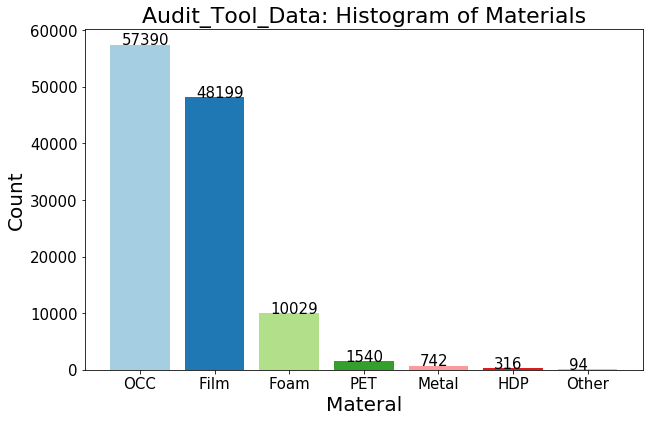

In [17]:
#Plot a histogram of the materials
plt.figure(figsize=(10,6))

material = audit_df.groupby('Material')['Material'].count().nlargest(7)
bars = ['OCC', 'Film', 'Foam', 'PET', 'Metal', 'HDP', 'Other']
y_pos = np.arange(len(bars))
#color=(['brown','black', 'red', 'green', 'blue', 'yellow', 'cyan']
plt.bar(bars, material, color=plt.cm.Paired(np.arange(len(bars))))
plt.xticks(y_pos, bars, size = 15)
plt.yticks(size = 15)

# Add some data labels
for i, v in enumerate(material):
     plt.text(y_pos[i] - 0.25, v + 0.15, str(v), size = 15)  

plt.title('Audit_Tool_Data: Histogram of Materials', fontsize=22)
plt.ylabel('Count', fontsize= 20)
plt.xlabel('Materal', fontsize = 20)
plt.subplots_adjust(bottom= 0.2, top = 0.99)
plt.savefig('Audit_Tool_Data: Histogram of Materials.png')
plt.show()

In [18]:
#Create new feature: variance in weight from one event+ material type to the next event+material type

#First calculate average weight for each material by device and apply to all dataframe
audit_df['standard_w_avg'] = audit_df.groupby(['device_id','Material'])['standard_weight'].transform(np.mean)

#Now calculate st dev for each material weight by device and apply to all dataframe
audit_df['standard_w_std'] = audit_df.groupby(['device_id','Material'])['standard_weight'].transform(np.std)

#Fill in any NaN values
audit_df['standard_w_std'].fillna('0', inplace=True)

#Convert the caterogy into int
audit_df['standard_w_std']  = pd.to_numeric(audit_df['standard_w_std']).astype(int)

#Check results
audit_df[['device_id','Material','standard_weight', 'standard_w_avg', 'standard_w_std']]

,device_id,Material,standard_weight,standard_w_avg,standard_w_std
122,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,76.0,265.870534,186
169,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,128.0,265.870534,186
32,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,130.0,265.870534,186
172,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,519.0,265.870534,186
225,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,117.0,265.870534,186
...,...,...,...,...,...
153091,02467072-ffd6-432e-ab02-97e477ee3f94,1,480.0,480.072407,70
153092,02467072-ffd6-432e-ab02-97e477ee3f94,1,462.0,480.072407,70
153093,02467072-ffd6-432e-ab02-97e477ee3f94,2,351.0,258.511628,59
153094,02467072-ffd6-432e-ab02-97e477ee3f94,1,450.0,480.072407,70


In [19]:
audit_df['mad_weight'] = abs(audit_df['standard_weight'] - audit_df['standard_w_avg'])

#Check results
round(audit_df[['device_id','Material','standard_weight', 'standard_w_avg', 'standard_w_std', 
                'mad_weight']],3)

,device_id,Material,standard_weight,standard_w_avg,standard_w_std,mad_weight
122,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,76.0,265.871,186,189.871
169,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,128.0,265.871,186,137.871
32,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,130.0,265.871,186,135.871
172,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,519.0,265.871,186,253.129
225,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,117.0,265.871,186,148.871
...,...,...,...,...,...,...
153091,02467072-ffd6-432e-ab02-97e477ee3f94,1,480.0,480.072,70,0.072
153092,02467072-ffd6-432e-ab02-97e477ee3f94,1,462.0,480.072,70,18.072
153093,02467072-ffd6-432e-ab02-97e477ee3f94,2,351.0,258.512,59,92.488
153094,02467072-ffd6-432e-ab02-97e477ee3f94,1,450.0,480.072,70,30.072


In [20]:
audit_df['mad_var'] = audit_df['mad_weight'] / audit_df['standard_w_std']

#Check results
round(audit_df[['device_id','Material','standard_weight', 'standard_w_avg', 'standard_w_std', 
                'mad_weight', 'mad_var']],3)

,device_id,Material,standard_weight,standard_w_avg,standard_w_std,mad_weight,mad_var
122,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,76.0,265.871,186,189.871,1.021
169,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,128.0,265.871,186,137.871,0.741
32,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,130.0,265.871,186,135.871,0.730
172,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,519.0,265.871,186,253.129,1.361
225,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,117.0,265.871,186,148.871,0.800
...,...,...,...,...,...,...,...
153091,02467072-ffd6-432e-ab02-97e477ee3f94,1,480.0,480.072,70,0.072,0.001
153092,02467072-ffd6-432e-ab02-97e477ee3f94,1,462.0,480.072,70,18.072,0.258
153093,02467072-ffd6-432e-ab02-97e477ee3f94,2,351.0,258.512,59,92.488,1.568
153094,02467072-ffd6-432e-ab02-97e477ee3f94,1,450.0,480.072,70,30.072,0.430


In [21]:
#groupby(['device_id','Material'])['mad_var'].

#Now create a function to convert the mad_var into a binary classifier
def weight_var(row):
    if row['mad_var'] > 1:
        return '1'
    else:
        return '0'
    
#Now call the function using .apply
audit_df['weight_var_index'] = audit_df.apply(weight_var, axis=1)

#Convert the caterogies into int
audit_df['weight_var_index']  = pd.to_numeric(audit_df['weight_var_index']).astype(int)

In [22]:
#Check results
round(audit_df[['device_id','Material','standard_weight', 'standard_w_avg', 'standard_w_std', 
                'mad_weight', 'mad_var', 'weight_var_index']],3)

,device_id,Material,standard_weight,standard_w_avg,standard_w_std,mad_weight,mad_var,weight_var_index
122,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,76.0,265.871,186,189.871,1.021,1
169,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,128.0,265.871,186,137.871,0.741,0
32,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,130.0,265.871,186,135.871,0.730,0
172,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,519.0,265.871,186,253.129,1.361,1
225,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,7,117.0,265.871,186,148.871,0.800,0
...,...,...,...,...,...,...,...,...
153091,02467072-ffd6-432e-ab02-97e477ee3f94,1,480.0,480.072,70,0.072,0.001,0
153092,02467072-ffd6-432e-ab02-97e477ee3f94,1,462.0,480.072,70,18.072,0.258,0
153093,02467072-ffd6-432e-ab02-97e477ee3f94,2,351.0,258.512,59,92.488,1.568,1
153094,02467072-ffd6-432e-ab02-97e477ee3f94,1,450.0,480.072,70,30.072,0.430,0


In [23]:
#pd.pivot_table(audit_df,index=['audit_status','net_weight', 'orig_net_weight']), 
                       #values=['net_weight', 'orig_net_weight'],aggfunc=[np.mean])

In [24]:
#Create new feature to identify if a value was changed
def change_value(row):
    if row['orig_net_weight'] != 0:
        return '1'
    else:
        return '0'
    
#use .apply() method by calling the function
audit_df['changed_weight'] = audit_df.apply(change_value, axis = 1)

#Convert the caterogy into int
audit_df['changed_weight']  = pd.to_numeric(audit_df['changed_weight']).astype(int)

print(audit_df.groupby('changed_weight')['changed_weight'].count())

changed_weight
0    117614
1       696
Name: changed_weight, dtype: int64


In [36]:
reasons2 = reasons2.loc[reasons2['package_id'] < 50000]
reasons2['package_id'].sort_values(ascending=False)
reasons2

,reject_reason,package_id
1,Device Failure,3536
2,From Excludes List,2145
3,No material in picture,63
4,Picture doesn´t match material description,142
5,Record was generated without photograph of pro...,9
6,Test package,226
7,Weight invalid,19


In [41]:
reasons = audit_df.groupby('reject_reason')['package_id'].count().nlargest(8)
reasons

reject_reason
0                                                     112170
Device Failure                                          3536
From Excludes List                                      2145
Test package                                             226
Picture doesn´t match material description               142
No material in picture                                    63
Weight invalid                                            19
Record was generated without photograph of product         9
Name: package_id, dtype: int64

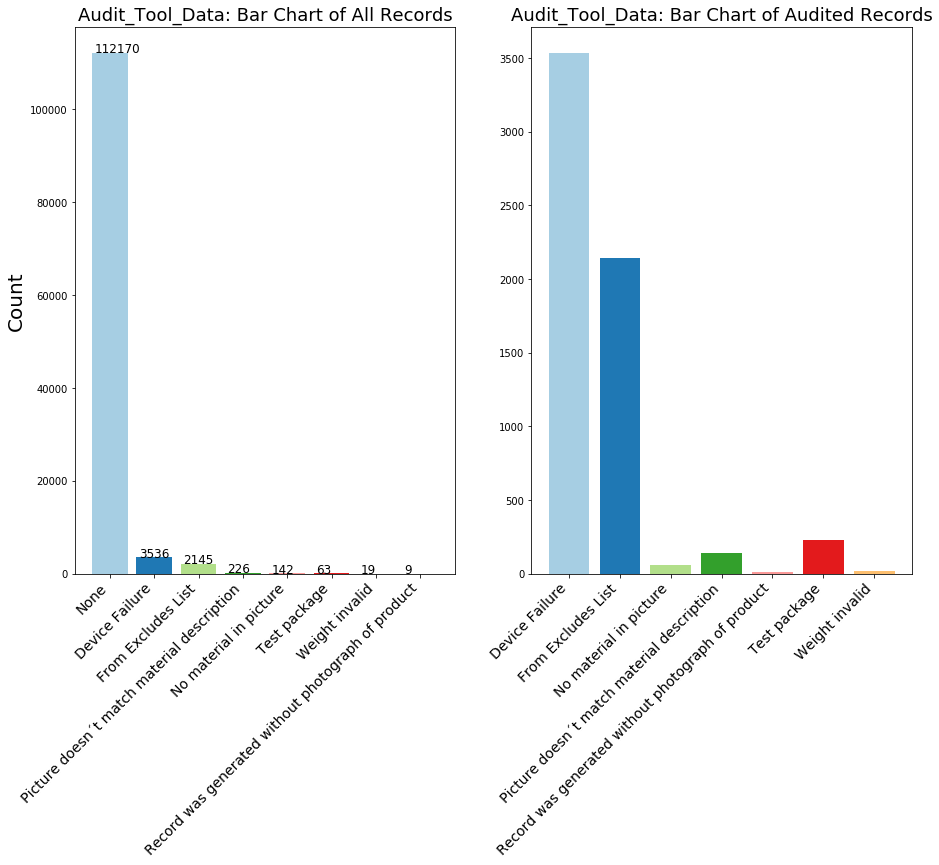

In [48]:
#Plot a histogram of the audit reject reasons

plt.figure(figsize=(15,10))

#First plot
plt.subplot(1,2,1)

reasons = audit_df.groupby('reject_reason')['package_id'].count().nlargest(8)
bars = ['None', 'Device Failure', 'From Excludes List',
       'Picture doesn´t match material description',
       'No material in picture', 'Test package','Weight invalid',
        'Record was generated without photograph of product',
        ]
y_pos = np.arange(len(bars))
plt.bar(bars, reasons, color=plt.cm.Paired(np.arange(len(bars))))
plt.xticks(y_pos, bars, size = 14)
plt.xticks(y_pos, bars, size = 14, rotation=45, ha='right')
# Add some labels.
for i, v in enumerate(reasons):
     plt.text(y_pos[i] - 0.35, v + 0.35, str(v), size = 12) 
plt.title('Audit_Tool_Data: Bar Chart of All Records', fontsize=18)
plt.ylabel('Count', fontsize= 20)
#plt.xlabel('Audit Reasons', fontsize = 15)

#Second plot
plt.subplot(1,2,2)

#create dataframe to exclude reject_reason '0' and sort data
reasons2 = audit_df.groupby('reject_reason')['package_id'].count().reset_index()
reasons2 = reasons2.loc[reasons2['package_id'] < 50000]
reasons2['package_id'].sort_values(ascending=False)
height = reasons2.iloc[:,-1]
bars2 = reasons2['reject_reason']

y_pos2 = np.arange(len(bars2))
plt.bar(bars2, height, color=plt.cm.Paired(np.arange(len(bars2))))
plt.xticks(y_pos2, bars2, size = 14, rotation=45, ha='right')

# Add some labels.
# for p in ax.patches:
#     ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
# for i, v in enumerate(reasons2):
#      plt.text(y_pos2[i] - 0.35, v + .035, v, size = 12)
plt.title('Audit_Tool_Data: Bar Chart of Only Audited Records', fontsize=18)

# Custom the subplot layout
plt.subplots_adjust(bottom=0.2, top=0.96)
plt.title('Audit_Tool_Data: Bar Chart of Audited Records', fontsize=18)
plt.savefig('Audit_Tool_Data: Bar Chart of Audited Records.png')
plt.show()

In [ ]:
audit_df.groupby('reject_reason')['device_id'].count().nlargest(8)

In [ ]:
reasons2 = audit_df.groupby('reject_reason')['package_id'].count().nsmallest(7)
reasons2.sort_values(ascending=False)

In [ ]:
#Create dummy variables for barcode category

#First need to fill in the missing values
audit_df['barcode'].fillna(value=0, inplace=True)

def label_present(label):
    if label == 0:
        return 0
    else:
        return 1
    
#use .apply() method by calling the function
audit_df['label'] = audit_df['barcode'].apply(label_present)

#Convert the caterogy into int
audit_df['label']  = pd.to_numeric(audit_df['label']).astype(int)

print(audit_df.groupby('label')['label'].count())

In [ ]:
#Create numerical categories for audit status: accept, reject or change

def audited(audit):
    if audit == 'A':
        return 1
    elif audit == 'R':
        return 2
    else:
        return 3
    
#use .apply() method to call the function
audit_df['audited'] = audit_df['audit_status'].apply(audited)

print(audit_df.groupby('audited')['audited'].count())


In [ ]:
#Create dummy variables for img_url

def image_present(image):
    if image == 0:
        return 0
    else:
        return 1
    
#use .apply() method by calling the function
audit_df['image'] = audit_df['img_url'].apply(image_present)

print(audit_df.groupby('image')['image'].count())

In [ ]:
audit_df.groupby(['reject_reason','audit_reject_reasonid'])['package_id'].count().reset_index()

In [ ]:
#Feature engineer a concantenated field of device_id & package_id to
#identify any duplicate records

#dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]
audit_df['device_pkg'] = audit_df['device_id'] + audit_df['package_id'].map(str)
audit_df['device_pkg'].value_counts()

In [ ]:
#audit_df.groupby(['device_pkg'])['device_pkg'].count()
audit_df['duplicate_counts'] = audit_df.groupby(['device_pkg'])['device_pkg'].transform('count')
audit_df['duplicate_counts']

In [ ]:
audit_df.loc[audit_df['duplicate_counts']> 1, ['device_pkg','device_id', 'package_id']]

In [ ]:
#Distribution of duplicate package ID counts by device

duplicates = audit_df['duplicate_counts']

plt.figure(figsize=(15,8))
sns.distplot(duplicates, bins=13, kde=False)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = duplicates.value_counts().max() 
ax.set_ylim([0, y_max+10000])
ax.set_xlim([0, 14])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='red', ha='center', va='bottom')

# Custom the subplot layout
plt.subplots_adjust(bottom=0.2, top=.95)
ax.set_title('Audit_Tool_Data: Histogram of Duplicated Package Counts per Device', fontsize=20)
plt.yticks(size = 15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13], size = 15, ha='left')
plt.ylabel('Count', fontsize= 18)
plt.xlabel('Duplicated Records p Device', fontsize = 18)
plt.savefig('Audit_Tool_Data: Histogram of Duplicated Package Counts per Device.png')
plt.show()
    
    
plt.savefig('Audit_Tool_Data: Histogram of Duplicated Record Count.png')

In [ ]:
dup_df = audit_df.loc[audit_df['duplicate_counts'] > 1, ['device_id', 'device_pkg','package_id', 'package_date', 'time_delta']]

In [ ]:
dup_df.sort_values(by='time_delta')

In [ ]:
# #Adjust data for outliers on weights and time deltas

# def using_mstats(s):
#     return winsorize(s, limits=[0.01, 0.05])

# audit_df[['net_weight', 'gross_weight', 'standard_weight','time_delta',
#           'standard_w_avg', 'standard_w_std', 'mad_weight']] = audit_df[[
#           'net_weight', 'gross_weight', 'standard_weight','time_delta',
#           'standard_w_avg', 'standard_w_std', 'mad_weight']].apply(using_mstats, axis=0)
    
# audit_df[['net_weight', 'gross_weight', 'standard_weight','time_delta',
#          'standard_w_avg', 'standard_w_std', 'mad_weight']].quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

In [ ]:
#Plot the standard weights against duplicate counts to see if there is any relationship
sns.set(style="white")

#create temporary df for plotting only R & C datapoints
plot_df = audit_df.loc[audit_df['audit_status'] != 'A']

# Plot mad_weights and time_deltas with standard weights
plt.figure(figsize=(15,10))

sns.relplot(x="mad_weight", y="time_delta", hue="audited", size="standard_weight",
            sizes=(40, 800), alpha=.5, palette="RdBu_r",
            height=6, data=plot_df)
plt.savefig('Audit_Tool_Data: Relationship Plot mad_weight, audited & time_delta.png')

In [ ]:
#Plot the standard weights against duplicate counts to see if there is any relationship
sns.set(style="white")


plt.figure(figsize=(15,10))

# Plot miles per gallon against horsepower with other semantics
sns.scatterplot(x="time_delta", y="mad_weight", hue="audited", 
            alpha=.5, palette="RdBu_r", data=plot_df)
plt.legend(loc='upper right')
plt.savefig('Audit_Tool_Data: Scatter Plot mad_weight & time_delta.png')

In [ ]:
round(audit_df.describe(),2).T

In [ ]:
#Box plot certain features to see data dispersion 

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
audit_df.boxplot(column=['standard_weight'])
plt.title('Boxplot: Standard_weight Data Dispersion', size= 20)
plt.xticks(size=20)
plt.yticks(size=20)

plt.subplot(1,2,2)
audit_df.boxplot(column=['time_delta'])
plt.title('Boxplot: Time_delta Data Dispersion', size= 20)
plt.xticks(size=20)
plt.yticks(size=20)


plt.savefig('Audit_Tool_Data: Boxplot of Weight Data Disperson.png')

In [ ]:
#df.loc[df['channel'] == 'sale']
audit_df.loc[audit_df['device_pkg'] == '3d9b3045-c718-4bd7-a5e2-be393fc059509',
             ['device_id', 'package_id', 'package_date', 'time_delta']]

In [ ]:
#Drop any remainging nan values and write dataset to a new file for modeling
audit_df.dropna(inplace=True)

audit_df.to_csv('/Users/sjadallah/Dropbox/Thinkful_data/Unsupervised Learning/audit_clean_dataset.csv')

In [ ]:
audit_df.info()

In [ ]:
audit_df.isnull().sum()/audit_df.isnull().count()

### The Final Dataframe for modeling

In [ ]:
round(audit_df.describe(),3).T

In [ ]:
round(audit_df.groupby('audit_status').mean(),3).T